### Adv. Hydrology Project:
---

#### 2. What are the impacts of different combinations of parameterization methods on modeling the temporal snow patterns?

SUMMA model sensitivity analysis comparing model parameterizations for:

##### Snow thermal conductivity
*   Parameterizations: ('tyen1965', 'melr1977', 'jrdn1991', 'smnv2000')
*   Parameters: fixedThermalCond_snow

##### Snow albedo decay
*   Parameterizations: ('conDecay', 'varDecay')
*   Parameters: albedoDecayRate


Snow pattern evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature
***

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pysumma as ps
import copy
import os.path
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
summa_executable = 'summa.exe'
# file manager for CUES model runs
case_path = '/home/jovyan/cues'
filemanager_path = os.path.join(case_path, 'summa_setup/cues_file_manager.txt')

### Baseline Model 

In [4]:
# CUES simulation setup
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
# set the simulation start and finish times
S.decisions.simulStart.set_value("2010-10-01 00:00")
S.decisions.simulFinsh.set_value("2017-08-01 22:00")

In [5]:
# run CUES simulation
S.start(run_option='local', run_suffix='cues')
S.monitor()

False

In [6]:
# Look at output
# print('stdout:\n-------\n{}\n========\n'.format(S.stdout))
# print('stderr:\n-------\n{}\n========\n'.format(S.stderr))

***
### SWE Timeline:

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


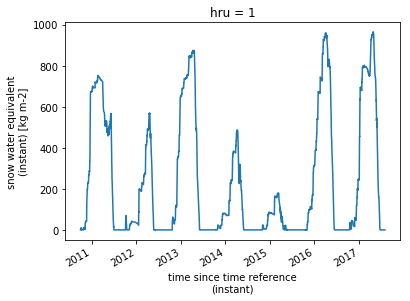

In [7]:
# Plot SWE timelines
S.output.scalarSWE.plot()
# cues.scalarSWE.plot(color='b',linestyle='-',alpha=0.5,label='Forced with CUES')
# ceres.scalarSWE.plot(color='k',linestyle='-',alpha=0.5,label='Forced with CERES')
# plt.legend(loc='upper left');

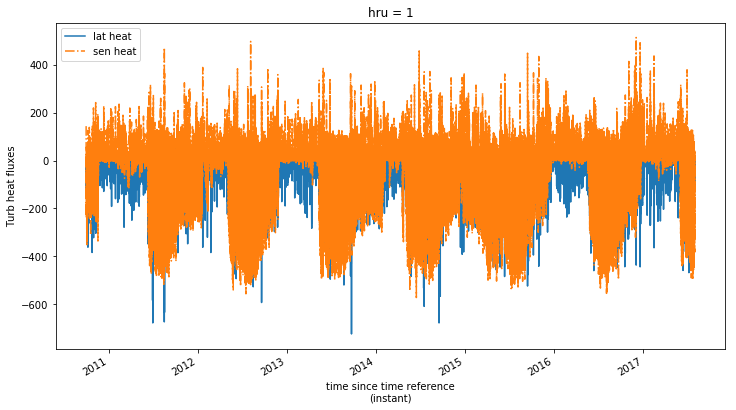

In [8]:
plt.figure(figsize=(12,6))
S.output.scalarLatHeatTotal.plot(label="lat heat")
S.output.scalarSenHeatTotal.plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

/srv/conda/lib/python3.6/site-packages/xarray/core/groupby.py:639: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


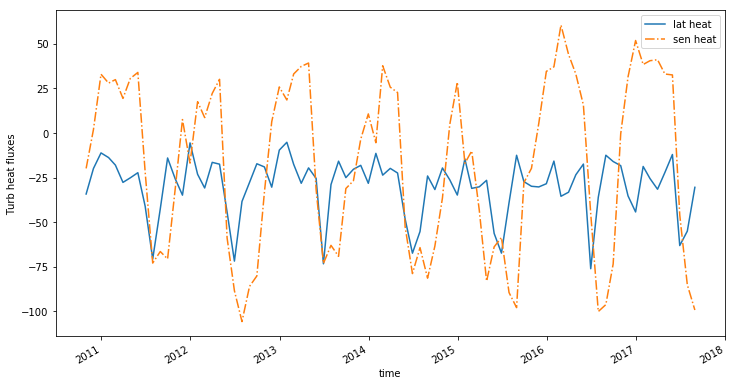

In [9]:
plt.figure(figsize=(12,6))
# plot monthly values
S.output.scalarLatHeatTotal.resample(time='1M').mean().plot(label="lat heat")
S.output.scalarSenHeatTotal.resample(time='1M').mean().plot(label="sen heat", linestyle="-.")
plt.ylabel("Turb heat fluxes")
plt.legend()

***
### Available options to change:

In [10]:
print(S.decisions)

simulStart    '2010-10-01 00:00'   ! simulation start time
simulFinsh    '2017-08-01 22:00'   ! simulation end time
soilCatTbl    ROSETTA              ! soil-category dataset
vegeParTbl    MODIFIED_IGBP_MODIS_NOAH ! vegetation-category dataset
soilStress    NoahType             ! choice of function for the soil moisture control on stomatal resistance
stomResist    BallBerry            ! choice of function for stomatal resistance
num_method    itertive             ! choice of numerical method
fDerivMeth    analytic             ! choice of method to calculate flux derivatives
LAI_method    monTable             ! choice of method to determine LAI and SAI
f_Richards    mixdform             ! form of Richards equation
groundwatr    qTopmodl             ! choice of groundwater parameterization
hc_profile    pow_prof             ! choice of hydraulic conductivity profile
bcUpprTdyn    nrg_flux             ! type of upper boundary condition for thermodynamics
bcLowrTdyn    zeroFlux            

In [11]:
S.decisions.thCondSnow.available_options

['tyen1965', 'melr1977', 'jrdn1991', 'smnv2000']

In [12]:
S.decisions.alb_method.available_options

['conDecay', 'varDecay']

Here we will do 8 different simulations - the four thermal conductivity options for each of the two albedo decay methods


***
### SUMMA - combinations of parameterizations

In [13]:
S_con_tyen = copy.copy(S)
S_con_tyen.decisions.thCondSnow.set_value('tyen1965')
S_con_tyen.decisions.alb_method.set_value('conDecay')
S_con_tyen.start(run_option = 'local', run_suffix="con_tyen")
S_con_tyen.monitor()

False

In [14]:
S_con_melr = copy.copy(S)
S_con_melr.decisions.thCondSnow.set_value('melr1977')
S_con_melr.decisions.alb_method.set_value('conDecay')
S_con_melr.start(run_option = 'local', run_suffix="con_melr")
S_con_melr.monitor()

False

In [15]:
S_con_jrdn = copy.copy(S)
S_con_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_con_jrdn.decisions.alb_method.set_value('conDecay')
S_con_jrdn.start(run_option = 'local', run_suffix="con_jrdn")
S_con_jrdn.monitor()

False

In [16]:
S_con_smnv = copy.copy(S)
S_con_smnv.decisions.thCondSnow.set_value('smnv2000')
S_con_smnv.decisions.alb_method.set_value('conDecay')
S_con_smnv.start(run_option = 'local', run_suffix="con_smnv")
S_con_smnv.monitor()

False

In [17]:
S_var_tyen = copy.copy(S)
S_var_tyen.decisions.thCondSnow.set_value('tyen1965')
S_var_tyen.decisions.alb_method.set_value('varDecay')
S_var_tyen.start(run_option = 'local', run_suffix="var_tyen")
S_var_tyen.monitor()

False

In [18]:
S_var_melr = copy.copy(S)
S_var_melr.decisions.thCondSnow.set_value('melr1977')
S_var_melr.decisions.alb_method.set_value('varDecay')
S_var_melr.start(run_option = 'local', run_suffix="var_melr")
S_var_melr.monitor()

False

In [19]:
S_var_jrdn = copy.copy(S)
S_var_jrdn.decisions.thCondSnow.set_value('jrdn1991')
S_var_jrdn.decisions.alb_method.set_value('varDecay')
S_var_jrdn.start(run_option = 'local', run_suffix="var_jrdn")
S_var_jrdn.monitor()

False

In [20]:
S_var_smnv = copy.copy(S)
S_var_smnv.decisions.thCondSnow.set_value('smnv2000')
S_var_smnv.decisions.alb_method.set_value('varDecay')
S_var_smnv.start(run_option = 'local', run_suffix="var_smnv")
S_var_smnv.monitor()

False

***

## Comparison Plots

### 1. Scalar SWE 

Text(0.5, 1.0, 'Sensitivity to Thermal Conductivity')

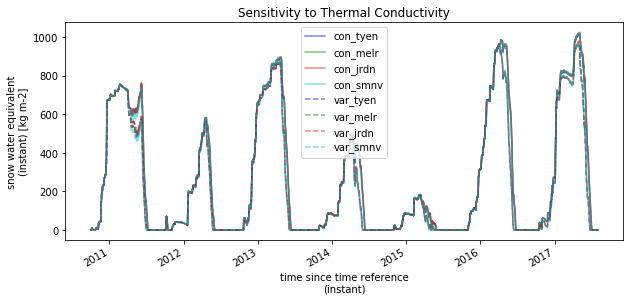

In [69]:
# Compare 'con' with different thermal conductivity options
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSWE.plot(color='b',linestyle='-',alpha=0.5, label='con_tyen')
S_con_melr.output.scalarSWE.plot(color='g',linestyle='-',alpha=0.5, label='con_melr')
S_con_jrdn.output.scalarSWE.plot(color='r',linestyle='-',alpha=0.5, label='con_jrdn')
S_con_smnv.output.scalarSWE.plot(color='c',linestyle='-',alpha=0.5, label='con_smnv')
S_var_tyen.output.scalarSWE.plot(color='b',linestyle='--',alpha=0.5, label='var_tyen')
S_var_melr.output.scalarSWE.plot(color='g',linestyle='--',alpha=0.5, label='var_melr')
S_var_jrdn.output.scalarSWE.plot(color='r',linestyle='--',alpha=0.5, label='var_jrdn')
S_var_smnv.output.scalarSWE.plot(color='c',linestyle='--',alpha=0.5, label='var_smnv')
plt.legend()
plt.title('Sensitivity to Thermal Conductivity')

Text(0.5, 1.0, 'Sensitivity to Thermal Conductivity - var albedo decay')

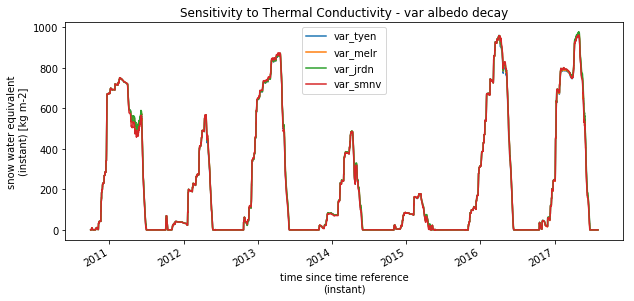

In [61]:
# Compare 'con' with different thermal conductivity options
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSWE.plot(label='var_tyen')
S_var_melr.output.scalarSWE.plot(label='var_melr')
S_var_jrdn.output.scalarSWE.plot(label='var_jrdn')
S_var_smnv.output.scalarSWE.plot(label='var_smnv')
plt.legend()
plt.title('Sensitivity to Thermal Conductivity - var albedo decay')

In [ ]:
def get_snow_disappearance_date(x,t):
    '''get date of last snow disappearance'''
    # reverse the datset
    x_r = x
    t_r = t
    # find the first non-zero SWE value
    for i in range(0,len(x_r)):
        if x_r[i] > 1:
            idx = i-1
    # dis date is the date of the last zero SWE value
    dis_date = t_r[idx]
    return dis_date # return the date

In [ ]:
# Plot SWE timelines

ct=S_con_tyen.output
cm=S_con_melr.output
cj=S_con_jrdn.output
cs=S_con_smnv.output
vs=S_var_smnv.output
# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

# resample to daily mean SWE values for snow disappearance date
ct_daily_mean = ct.scalarSWE.resample(time='1D').mean()
cm_daily_mean = cm.scalarSWE.resample(time='1D').mean()
cj_daily_mean = cj.scalarSWE.resample(time='1D').mean()
cs_daily_mean = cs.scalarSWE.resample(time='1D').mean()
vs_daily_mean = vs.scalarSWE.resample(time='1D').mean()

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(12,12))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
    # Find snow disappearance date
    ct_dis_date = get_snow_disappearance_date(ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cm_dis_date = get_snow_disappearance_date(cm_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               cm_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cj_dis_date = get_snow_disappearance_date(cj_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               cj_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cs_dis_date = get_snow_disappearance_date(cs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               cs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    vs_dis_date = get_snow_disappearance_date(vs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               vs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
 
    
    # Plot April 1st SWE from both model runs
    april1 = datetime.strptime('{}-04-01 00:00:00'.format(year+1),'%Y-%m-%d %H:%M:%S')
    ax[i].scatter(april1, ct.scalarSWE.loc[april1].values[0],
       color='b',label='Apr. 1 SWE = {} mm'.format((np.round(ct.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, cm.scalarSWE.loc[april1].values[0],
       color='g',label='Apr. 1 SWE = {} mm'.format((np.round(cm.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, cj.scalarSWE.loc[april1].values[0],
       color='r',label='Apr. 1 SWE = {} mm'.format((np.round(cj.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, cs.scalarSWE.loc[april1].values[0],
       color='c',label='Apr. 1 SWE = {} mm'.format((np.round(cs.scalarSWE.loc[april1].values[0],1))))

    # Plot SWE from both model runs
    ct.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='--',alpha=0.5,
                                                                              label='con_tyen')
    cm.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='g',linestyle='--',alpha=0.5,
                                                                              label='con_melr')
    cj.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='r',linestyle='--',alpha=0.5,
                                                                              label='con_jrdn')
    cs.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='c',linestyle='--',alpha=0.5,
                                                                              label='con_smnv')

    # Plot snow disappearance dates
    ax[i].plot([ct_dis_date],[0],'xb',label='Disap. Date {}'.format(np.datetime_as_string(ct_dis_date)[0:10]))
    ax[i].plot([cm_dis_date],[0],'xg',label='Disap. Date {}'.format(np.datetime_as_string(cm_dis_date)[0:10]))
    ax[i].plot([cj_dis_date],[0],'xr',label='Disap. Date {}'.format(np.datetime_as_string(cj_dis_date)[0:10]))
    ax[i].plot([cs_dis_date],[0],'xc',label='Disap. Date {}'.format(np.datetime_as_string(cs_dis_date)[0:10]))
     

    ax[i].set_title('SWE, WY {}'.format(year)) #,
#                                                                        np.round(cues.scalarSWE.loc[april1].values[0]-ceres.scalarSWE.loc[april1].values[0],1),
#                                                                       (cues_dis_date-ceres_dis_date).astype('timedelta64[D]') / np.timedelta64(1, 'D')))
   
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1
    
fig.savefig('swe_plots.png',dpi=300)

In [ ]:

def get_accumulation(x,t):
    '''get array of values from x that are accumulating'''
    c = 0 # accumulation indexer
    accum = [x[0]] # initialize with our first value
    accum_t = [t[0]]
    for n in range(1,len(x)):
        if x[n] >= accum[c]: # if SWE is greater or equal than previous day
            accum.append(x[n]) # add to accumulation
            accum_t.append(t[n])
            c+=1 # accumulation indexer
    return np.array([accum, accum_t]) # return np array of accumulation and time

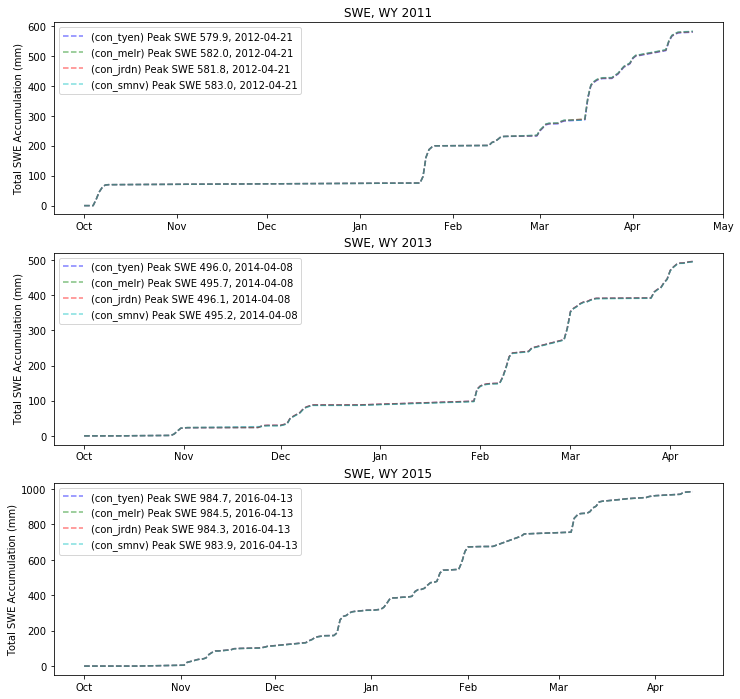

In [46]:
# compare SWE accumulation curves
water_years = np.array(np.linspace(2011,2015,3),dtype='int32') # define our water years

ct=S_con_tyen.output
cm=S_con_melr.output
cj=S_con_jrdn.output
cs=S_con_smnv.output
# resample to daily mean SWE values
ct_daily_mean = ct.scalarSWE.resample(time='1D').mean()
cm_daily_mean = cm.scalarSWE.resample(time='1D').mean()
cj_daily_mean = cj.scalarSWE.resample(time='1D').mean()
cs_daily_mean = cs.scalarSWE.resample(time='1D').mean()

fig, ax = plt.subplots(len(water_years),1,figsize=(12,12))
i=0
for year in water_years:
    # compute and plot SWE accumulation curves for each water year
    ct_swe_accum = get_accumulation(ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cm_swe_accum = get_accumulation(cm_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      cm_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cj_swe_accum = get_accumulation(cj_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      cj_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    cs_swe_accum = get_accumulation(cs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      cs_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)

    # Plot SWE accumulation curves
    ax[i].plot(ct_swe_accum[1],ct_swe_accum[0],
               color='b',linestyle='--',alpha=0.5,
               label='(con_tyen) Peak SWE {}, {}'.format(np.round(ct_swe_accum[0].max(),1),
                                                     np.datetime_as_string(ct_swe_accum[1].max())[0:10]))
    ax[i].plot(cm_swe_accum[1],cm_swe_accum[0],
               color='g',linestyle='--',alpha=0.5,
               label='(con_melr) Peak SWE {}, {}'.format(np.round(cm_swe_accum[0].max(),1),
                                                     np.datetime_as_string(cm_swe_accum[1].max())[0:10]))
    ax[i].plot(cj_swe_accum[1],cj_swe_accum[0],
               color='r',linestyle='--',alpha=0.5,
               label='(con_jrdn) Peak SWE {}, {}'.format(np.round(cj_swe_accum[0].max(),1),
                                                     np.datetime_as_string(cj_swe_accum[1].max())[0:10]))
    ax[i].plot(cs_swe_accum[1],cs_swe_accum[0],
               color='c',linestyle='--',alpha=0.5,
               label='(con_smnv) Peak SWE {}, {}'.format(np.round(cs_swe_accum[0].max(),1),
                                                     np.datetime_as_string(cs_swe_accum[1].max())[0:10]))

#     # Format plot title
    ax[i].set_title('SWE, WY {}'.format(year)) # | Peak SWE $\Delta$mm {}, $\Delta$days {}'.format(year,
#                                                                                  np.round(ct_swe_accum[0].max() - ct_swe_accum[0].max(),1),
#                                                                                  (cues_swe_accum[1].max()-ceres_swe_accum[1].max()).astype('timedelta64[D]') / np.timedelta64(1, 'D')))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Total SWE Accumulation (mm)')

    
    i+=1

fig.savefig('swe_accum_plots.png',dpi=300)

Text(0.5, 1.0, "Sensitivity to Albedo Decay for 'tyen'")

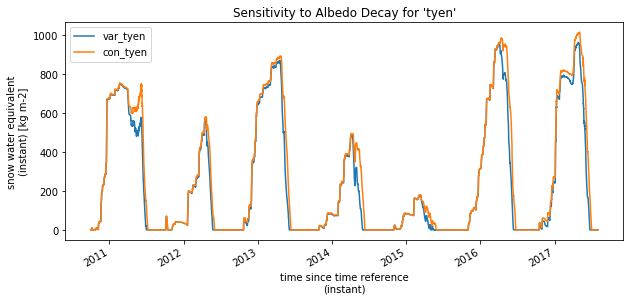

In [26]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSWE.plot(label='var_tyen')
S_con_tyen.output.scalarSWE.plot(label='con_tyen')
plt.legend()
plt.title("Sensitivity to Albedo Decay for 'tyen'")

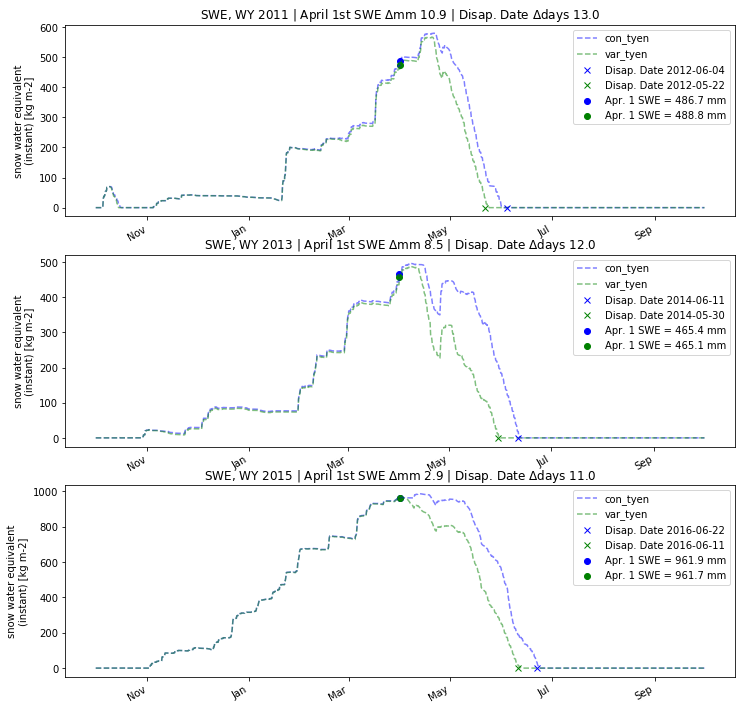

In [48]:
# Plot SWE timelines


ct=S_con_tyen.output
vt=S_var_tyen.output
# Define our water years
water_years = np.array(np.linspace(2011,2015,3),dtype='int32')

# resample to daily mean SWE values for snow disappearance date
ct_daily_mean = ct.scalarSWE.resample(time='1D').mean()
vt_daily_mean = vt.scalarSWE.resample(time='1D').mean()


# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(12,12))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
    # Find snow disappearance date
    ct_dis_date = get_snow_disappearance_date(ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    vt_dis_date = get_snow_disappearance_date(vt_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)],
                                               vt_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    
    
    # Plot April 1st SWE from both model runs
    april1 = datetime.strptime('{}-04-01 00:00:00'.format(year+1),'%Y-%m-%d %H:%M:%S')
    ax[i].scatter(april1, ct.scalarSWE.loc[april1].values[0],
       color='b',label='Apr. 1 SWE = {} mm'.format((np.round(ct.scalarSWE.loc[april1].values[0],1))))
    ax[i].scatter(april1, vt.scalarSWE.loc[april1].values[0],
       color='g',label='Apr. 1 SWE = {} mm'.format((np.round(cm.scalarSWE.loc[april1].values[0],1))))
    
    # Plot SWE from both model runs
    ct.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='--',alpha=0.5,
                                                                              label='con_tyen')
    vt.scalarSWE.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='g',linestyle='--',alpha=0.5,
                                                                              label='var_tyen')
    # Plot snow disappearance dates
    ax[i].plot([ct_dis_date],[0],'xb',label='Disap. Date {}'.format(np.datetime_as_string(ct_dis_date)[0:10]))
    ax[i].plot([vt_dis_date],[0],'xg',label='Disap. Date {}'.format(np.datetime_as_string(vt_dis_date)[0:10]))
     
#     # Format the plot for this water ayear
    ax[i].set_title('SWE, WY {} | April 1st SWE $\Delta$mm {} | Disap. Date $\Delta$days {}'.format(year,
                                                                       np.round(ct.scalarSWE.loc[april1].values[0]-vt.scalarSWE.loc[april1].values[0],1),
                                                                      (ct_dis_date-vt_dis_date).astype('timedelta64[D]') / np.timedelta64(1, 'D')))
   
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1
    
fig.savefig('swe_plots.png',dpi=300)

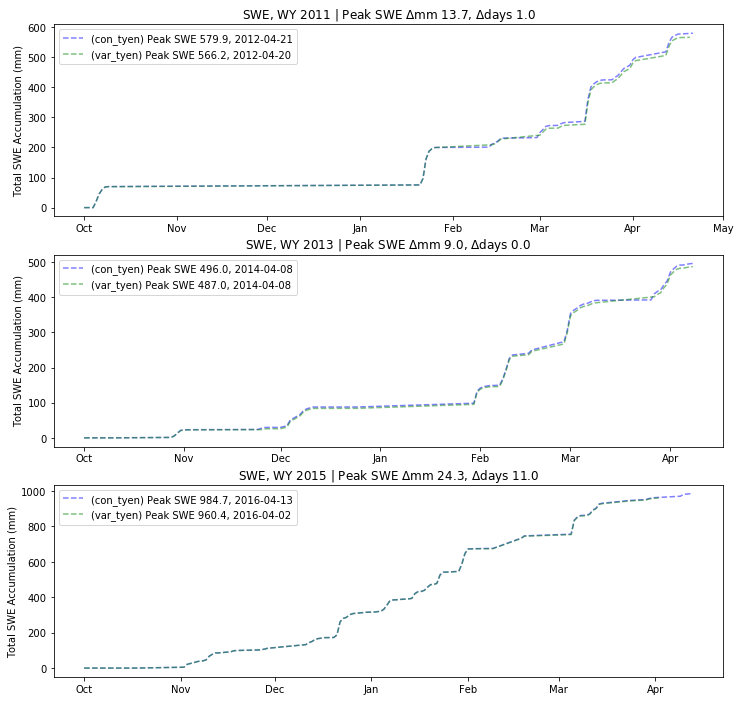

In [50]:
# compare SWE accumulation curves
water_years = np.array(np.linspace(2011,2015,3),dtype='int32') # define our water years

ct=S_con_tyen.output
vt=S_var_tyen.output

# resample to daily mean SWE values
ct_daily_mean = ct.scalarSWE.resample(time='1D').mean()
vt_daily_mean = vt.scalarSWE.resample(time='1D').mean()


fig, ax = plt.subplots(len(water_years),1,figsize=(12,12))
i=0
for year in water_years:
    # compute and plot SWE accumulation curves for each water year
    ct_swe_accum = get_accumulation(ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      ct_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)
    vt_swe_accum = get_accumulation(vt_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].values,
                                      vt_daily_mean.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].time.values)

    # Plot SWE accumulation curves
    ax[i].plot(ct_swe_accum[1],ct_swe_accum[0],
               color='b',linestyle='--',alpha=0.5,
               label='(con_tyen) Peak SWE {}, {}'.format(np.round(ct_swe_accum[0].max(),1),
                                                     np.datetime_as_string(ct_swe_accum[1].max())[0:10]))
    ax[i].plot(vt_swe_accum[1],vt_swe_accum[0],
               color='g',linestyle='--',alpha=0.5,
               label='(var_tyen) Peak SWE {}, {}'.format(np.round(vt_swe_accum[0].max(),1),
                                                     np.datetime_as_string(vt_swe_accum[1].max())[0:10]))

#     # Format plot title
    ax[i].set_title('SWE, WY {} | Peak SWE $\Delta$mm {}, $\Delta$days {}'.format(year,
                                                                                 np.round(ct_swe_accum[0].max() - vt_swe_accum[0].max(),1),
                                                                                 (ct_swe_accum[1].max()-vt_swe_accum[1].max()).astype('timedelta64[D]') / np.timedelta64(1, 'D')))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Total SWE Accumulation (mm)')

    
    i+=1

fig.savefig('swe_accum_plots.png',dpi=300)

Text(0.5, 1.0, "Sensitivity to Albedo Decay for 'jrdn'")

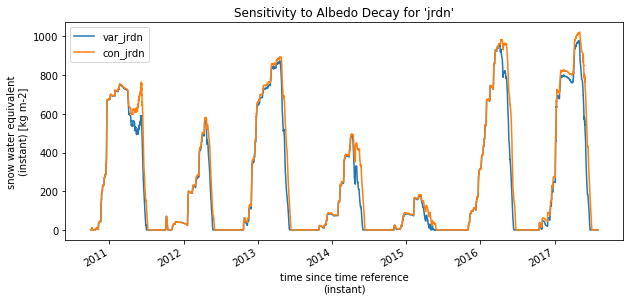

In [29]:
# Compare var v/s con for jrdn -- Not showing
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSWE.plot(label='var_jrdn')
S_con_jrdn.output.scalarSWE.plot(label='con_jrdn')
plt.legend()
plt.title("Sensitivity to Albedo Decay for 'jrdn'")

***
### 2a. Snow Surface Temperature 

Text(0.5, 1.0, "Sensitivity to Thermal Conductivity for 'con' albDecay")

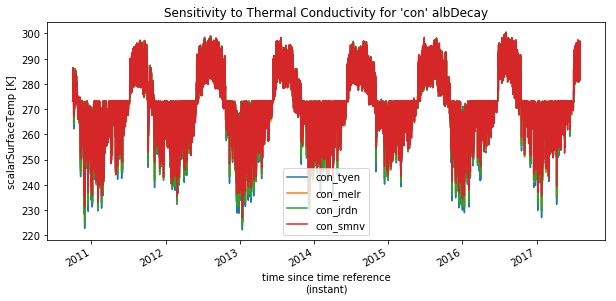

In [84]:
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.plot(label='con_smnv')
plt.legend()
plt.ylabel('scalarSurfaceTemp [K]')
plt.title("Sensitivity to Thermal Conductivity for 'con' albDecay")

Text(0.5, 1.0, "Sensitivity to Albedo Decay for 'tyen' thermCond")

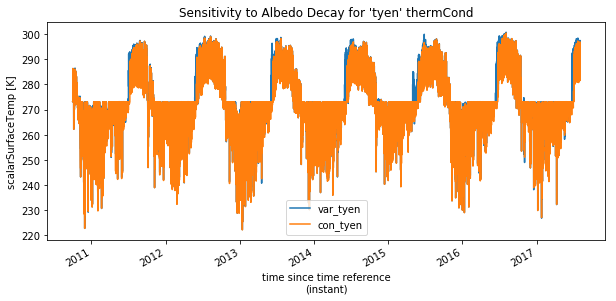

In [85]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.plot(label='con_tyen')
plt.legend()
plt.ylabel('scalarSurfaceTemp [K]')
plt.title("Sensitivity to Albedo Decay for 'tyen' thermCond")

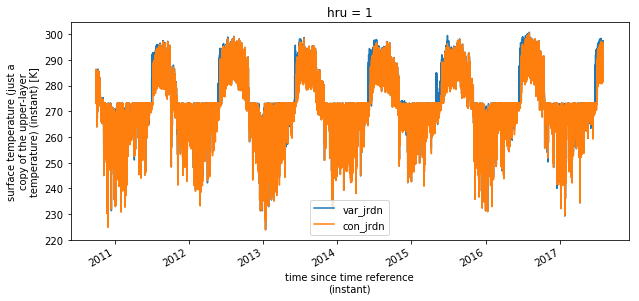

In [54]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.plot(label='con_jrdn')
plt.legend()

### 2b. Monthly Snow Surface Temperature

Text(0.5, 1.0, 'Sensitivity to Thermal Conductivity Options (Monthly Avg.)')

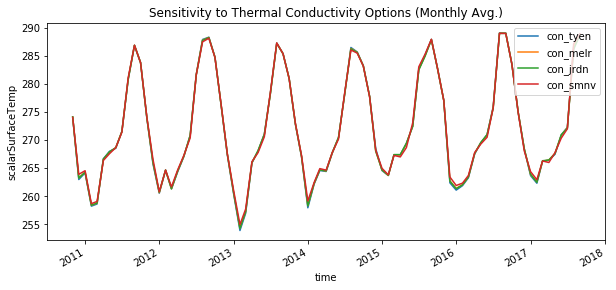

In [58]:
# Compare all thermal cond options for con albedo
plt.figure(figsize=[10,4])
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
S_con_melr.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_melr')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
S_con_smnv.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_smnv')
plt.legend()
plt.title('Sensitivity to Thermal Conductivity Options (Monthly Avg.)')

Text(0.5, 1.0, "Sensitivity to Albedo Decay for 'tyen' (Monthly Avg.)")

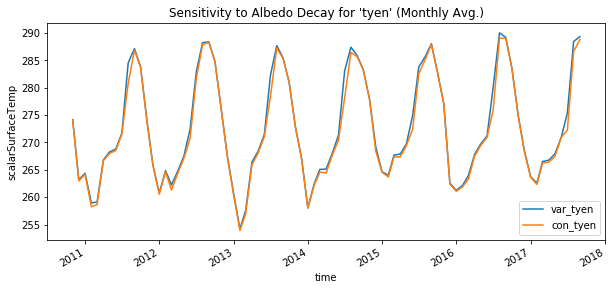

In [57]:
# Compare var v/s con for tyen 
plt.figure(figsize=[10,4])
S_var_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_tyen')
S_con_tyen.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_tyen')
plt.legend()
plt.title("Sensitivity to Albedo Decay for 'tyen' (Monthly Avg.)")

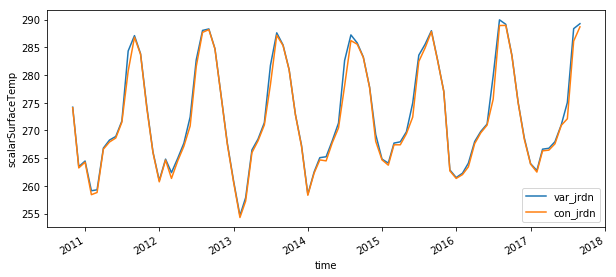

In [35]:
# Compare var v/s con for jrdn 
plt.figure(figsize=[10,4])
S_var_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='var_jrdn')
S_con_jrdn.output.scalarSurfaceTemp.resample(time='1M').mean().plot(label='con_jrdn')
plt.legend()

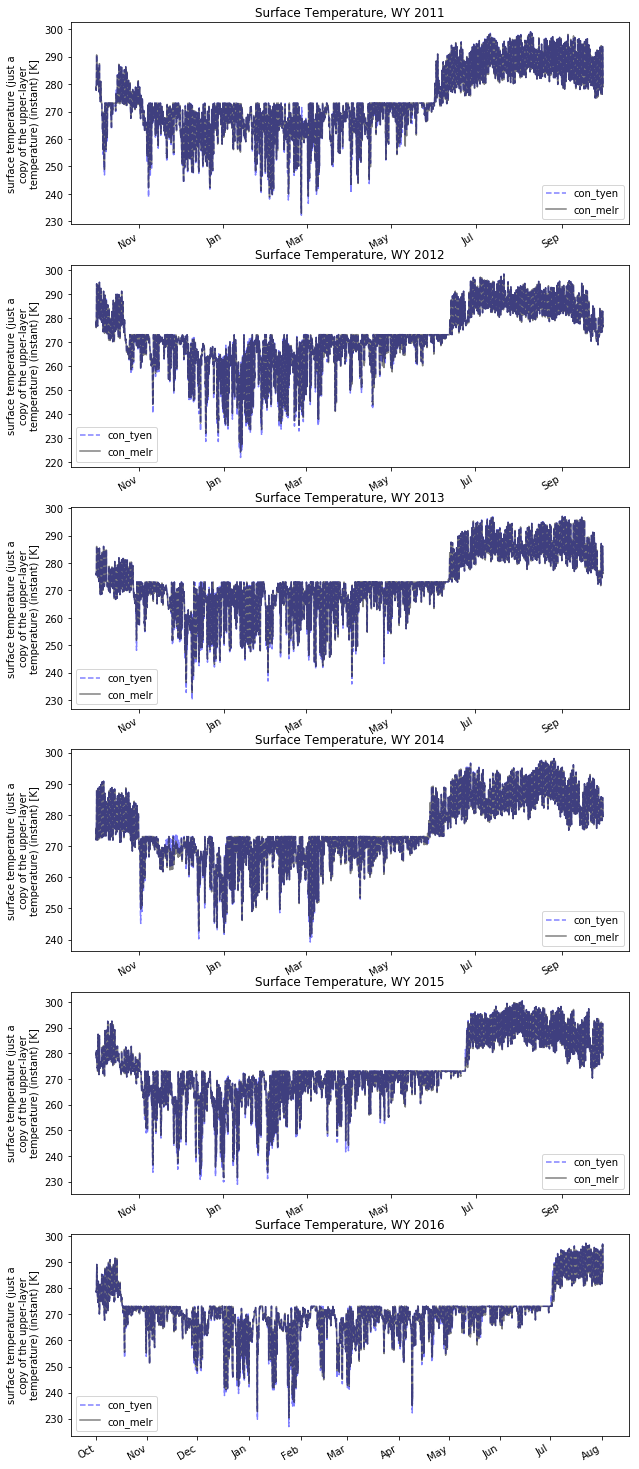

In [72]:
# Plot Tss timelines
# compare snow surface temperature

# Define our water years
water_years = np.array(np.linspace(2011,2016,6),dtype='int32')

# initialize plots
fig, ax = plt.subplots(len(water_years),1,figsize=(10,26))

i=0 # for interating over subplots

for year in water_years: # plot each water year individually
    
      
    # Plot surface temperature from both model runs
    ct.scalarSurfaceTemp.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='b',linestyle='--',alpha=0.5,label='con_tyen')
    cm.scalarSurfaceTemp.loc['{}-10-01'.format(year):'{}-9-30'.format(year+1)].plot(ax=ax[i],color='k',linestyle='-',alpha=0.5,label='con_melr')
    
    # Format the plot for this water ayear
    ax[i].set_title('Surface Temperature, WY {}'.format(year))
    ax[i].legend()
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i].set_xlabel('')
    
    # iterate for subplots
    i+=1
    
fig.savefig('surface_temp_plots.png',dpi=300)

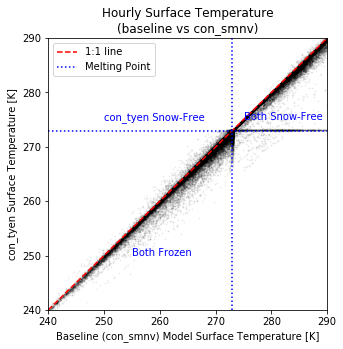

In [80]:
# 1-to-1 plots
fig, ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.scatter(vs.scalarSurfaceTemp.values,
            cs.scalarSurfaceTemp.values,
            c='k',s=1,alpha=0.05)
ax1.plot([240,300],
         [240,300],'--r',label='1:1 line')
ax1.plot([240,300],
         [273,273],':b',label='Melting Point')
ax1.plot([273,273],
         [240,300],':b')
ax1.set_title('Hourly Surface Temperature\n(baseline vs con_smnv)')
ax1.set_xlabel('Baseline (con_smnv) Model Surface Temperature [K]');
ax1.set_xlim((240,290))
ax1.set_ylabel('con_tyen Surface Temperature [K]');
ax1.set_ylim((240,290))
plt.legend()

plt.text(275,275,'Both Snow-Free',color='b')
plt.text(255,250,'Both Frozen',color='b')
plt.text(250,275,'con_tyen Snow-Free',color='b')

fig.savefig('surf-temp_1-to-1_plots.png',dpi=300)

In [76]:
model_runs =  {'S_con_tyen': S_con_tyen, 
               'S_con_melr': S_con_melr, 
               'S_con_jrdn': S_con_jrdn, 
               'S_con_smnv': S_con_smnv,
               'S_var_tyen': S_var_tyen,
               'S_var_melr': S_var_melr, 
               'S_var_jrdn': S_var_jrdn,
               'S_var_smnv': S_var_smnv}


for name in model_runs:
    s = model_runs[name]
    # resample to daily mean SWE values for snow disappearance date
    s_daily_mean = s.output.scalarSWE.resample(time='1D').mean()

    error = vs.scalarSurfaceTemp.resample(time='1D').mean() - s.output.scalarSurfaceTemp.resample(time='1D').mean()
    SE = error**2
    MSE = SE.mean()
    RMSE = MSE**(1/2)
    print(name,RMSE)


S_con_tyen <xarray.DataArray 'scalarSurfaceTemp' ()>
array(1.826161)
S_con_melr <xarray.DataArray 'scalarSurfaceTemp' ()>
array(1.768285)
S_con_jrdn <xarray.DataArray 'scalarSurfaceTemp' ()>
array(1.813049)
S_con_smnv <xarray.DataArray 'scalarSurfaceTemp' ()>
array(1.647521)
S_var_tyen <xarray.DataArray 'scalarSurfaceTemp' ()>
array(0.705214)
S_var_melr <xarray.DataArray 'scalarSurfaceTemp' ()>
array(0.521635)
S_var_jrdn <xarray.DataArray 'scalarSurfaceTemp' ()>
array(0.60071)
S_var_smnv <xarray.DataArray 'scalarSurfaceTemp' ()>
array(0.)
